# Activations: Noisy versus Baseline Model

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from undt_ai.load import load_single
from undt_ai.tools import normal
import seaborn as sns
import tensorflow as tf
from undt_ai.synthetic_build import n_layer_model
from undt_ai.tools import normal, noise_augment,  rmse
from undt_ai.load import load_pipeline
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras import models

In [189]:
# Load data and cerate noise augmented version

fpath_s = Path.home().joinpath('Dropbox/Projects/undt-ai/Data/synth_data_vel.npz')
data = load_pipeline(fpath_s, levels=[0,])

t, data = data[:3], data[3:]
x_train, x_val, x_test = data[:3]
y_train_Dmin, y_val_Dmin, y_test_Dmin = data[3:6]
y_train_D, y_val_D, y_test_D = data[6:9]
y_train_rms, y_val_rms, y_test_rms = data[9:]

x_train_noise, _ = noise_augment(x_train, [y_train_D], levels=[0.3])

# Load it all
data = np.load(fpath_s)
x_all = data['signal'][:, 45:]

In [31]:
# Create model and save before training
model = n_layer_model(n_layers=3, kernel_size=71, batch_norm=True, drop_layers=[0])
model.summary()
model.save('tmp.h5')

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 255, 1)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 185, 64)           4608      
_________________________________________________________________
batch_normalization_24 (Batc (None, 185, 64)           256       
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 115, 64)           290880    
_________________________________________________________________
batch_normalization_25 (Batc (None, 115, 64)           256       
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 45, 64)            290880    
_________________________________________________________________
batch_normalization_26 (Batc (None, 45, 64)            256 

In [122]:
# Reload (in case of rerunning)
model_baseline = load_model('tmp.h5', custom_objects={'rmse': rmse})

In [123]:
# Checkpointing and train
model_checkpoint = ModelCheckpoint(filepath='tmp_baseline.h5', monitor='val_loss',
                                                            save_best_only=True)
model_baseline.fit(normal(x_train), [1000 * y_train_D],
                                            epochs=300, batch_size=128, 
                                            validation_data=[normal(x_val), 1000 * y_val_D], callbacks=[model_checkpoint])

Train on 8379 samples, validate on 932 samples
Epoch 1/300
8379/8379 [==============================] - 2s 263us/sample - loss: 7.0290 - rmse: 2.0060 - val_loss: 0.8613 - val_rmse: 0.9277
Epoch 2/300
8379/8379 [==============================] - 1s 94us/sample - loss: 0.7680 - rmse: 0.8502 - val_loss: 0.6830 - val_rmse: 0.8165
Epoch 3/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.6171 - rmse: 0.7647 - val_loss: 0.2443 - val_rmse: 0.4936
Epoch 4/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.4330 - rmse: 0.6345 - val_loss: 0.2938 - val_rmse: 0.5297
Epoch 5/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.5624 - rmse: 0.7162 - val_loss: 0.2386 - val_rmse: 0.4873
Epoch 6/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.3606 - rmse: 0.5772 - val_loss: 0.4335 - val_rmse: 0.6390
Epoch 7/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.3175 - rmse: 0.5422 - val_loss

Epoch 59/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0621 - rmse: 0.2397 - val_loss: 0.0697 - val_rmse: 0.2648
Epoch 60/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0369 - rmse: 0.1883 - val_loss: 0.0530 - val_rmse: 0.2336
Epoch 61/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0359 - rmse: 0.1856 - val_loss: 0.0344 - val_rmse: 0.1867
Epoch 62/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.0424 - rmse: 0.2014 - val_loss: 0.0326 - val_rmse: 0.1814
Epoch 63/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0323 - rmse: 0.1753 - val_loss: 0.0411 - val_rmse: 0.2058
Epoch 64/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0289 - rmse: 0.1667 - val_loss: 0.0334 - val_rmse: 0.1857
Epoch 65/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0264 - rmse: 0.1597 - val_loss: 0.0390 - val_rmse: 0.2010
Epoch 66/300


Epoch 117/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0386 - rmse: 0.1894 - val_loss: 0.0260 - val_rmse: 0.1625
Epoch 118/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0237 - rmse: 0.1506 - val_loss: 0.0362 - val_rmse: 0.1931
Epoch 119/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0268 - rmse: 0.1593 - val_loss: 0.0351 - val_rmse: 0.1909
Epoch 120/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0307 - rmse: 0.1727 - val_loss: 0.0881 - val_rmse: 0.2982
Epoch 121/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0332 - rmse: 0.1775 - val_loss: 0.0616 - val_rmse: 0.2433
Epoch 122/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0268 - rmse: 0.1593 - val_loss: 0.0708 - val_rmse: 0.2673
Epoch 123/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0230 - rmse: 0.1475 - val_loss: 0.0492 - val_rmse: 0.2246
Epoch 

Epoch 175/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0206 - rmse: 0.1405 - val_loss: 0.0240 - val_rmse: 0.1572
Epoch 176/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0194 - rmse: 0.1359 - val_loss: 0.0317 - val_rmse: 0.1741
Epoch 177/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0207 - rmse: 0.1393 - val_loss: 0.0240 - val_rmse: 0.1570
Epoch 178/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0190 - rmse: 0.1356 - val_loss: 0.0212 - val_rmse: 0.1485
Epoch 179/300
8379/8379 [==============================] - 1s 95us/sample - loss: 0.0183 - rmse: 0.1314 - val_loss: 0.0171 - val_rmse: 0.1308
Epoch 180/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0138 - rmse: 0.1139 - val_loss: 0.0579 - val_rmse: 0.2462
Epoch 181/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0182 - rmse: 0.1288 - val_loss: 0.0208 - val_rmse: 0.1465
Epoch 

Epoch 233/300
8379/8379 [==============================] - 1s 95us/sample - loss: 0.0145 - rmse: 0.1167 - val_loss: 0.0153 - val_rmse: 0.1256
Epoch 234/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0164 - rmse: 0.1237 - val_loss: 0.0315 - val_rmse: 0.1794
Epoch 235/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0121 - rmse: 0.1064 - val_loss: 0.0228 - val_rmse: 0.1519
Epoch 236/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0245 - rmse: 0.1469 - val_loss: 0.0349 - val_rmse: 0.1892
Epoch 237/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0174 - rmse: 0.1276 - val_loss: 0.0185 - val_rmse: 0.1391
Epoch 238/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0109 - rmse: 0.1020 - val_loss: 0.0168 - val_rmse: 0.1308
Epoch 239/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0118 - rmse: 0.1047 - val_loss: 0.0242 - val_rmse: 0.1598
Epoch 

Epoch 291/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0094 - rmse: 0.0935 - val_loss: 0.0164 - val_rmse: 0.1289
Epoch 292/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0115 - rmse: 0.1037 - val_loss: 0.0148 - val_rmse: 0.1226
Epoch 293/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0099 - rmse: 0.0958 - val_loss: 0.0204 - val_rmse: 0.1465
Epoch 294/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0127 - rmse: 0.1101 - val_loss: 0.0180 - val_rmse: 0.1341
Epoch 295/300
8379/8379 [==============================] - 1s 88us/sample - loss: 0.0099 - rmse: 0.0969 - val_loss: 0.0294 - val_rmse: 0.1730
Epoch 296/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0160 - rmse: 0.1223 - val_loss: 0.0231 - val_rmse: 0.1510
Epoch 297/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0150 - rmse: 0.1175 - val_loss: 0.0229 - val_rmse: 0.1523
Epoch 

In [186]:
# Grab layers
model_baseline.load_weights('tmp_baseline.h5')
layer_outputs = [layer.output for layer in model_baseline.layers[:6]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model_baseline.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [190]:
# And then activations
activations_baseline = activation_model.predict(normal(x_all)) # Returns a list of five Numpy arrays: one array per layer activation

In [142]:
first_layer_activation = activations_baseline[1]
print(first_layer_activation.shape)
fla = first_layer_activation[5007] # .reshape(185, 8, 8)

(12416, 185, 64)


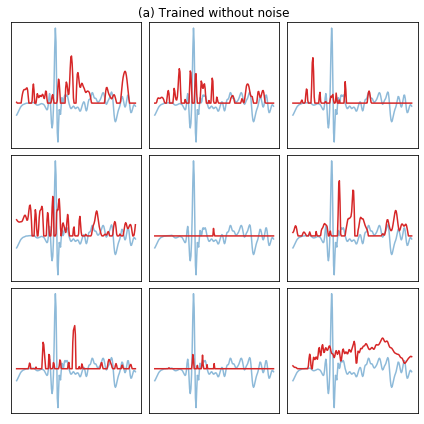

In [365]:
# Plot some selection of those activations
fig, axes = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True) #, gridspec_kw = {'wspace':0.05, 'hspace':0.05})
layer = 1 #first CNN layer)
trace= 4651# 5004
acts = activations_baseline[layer][trace]
axes= axes.flatten()

profile = normal(x_all)[trace]
for ax, d in zip(axes, acts.T[19::2]):
    ax.plot(profile[35:-35] / 2, alpha=0.5)
    ax.plot(d, c='C3')
    ax.set_xticks([])
    ax.set_yticks([])
axes[1].set_title('(a) Trained without noise')
fig.tight_layout(w_pad=-2.25, h_pad=0.4)
figpath = Path.home().joinpath('Dropbox/Projects/undt-ai/Figures')
# fig.savefig(figpath / 'activations_nonoise.png', dpi=400)

C:\Users\casim\Miniconda3\envs\mlflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


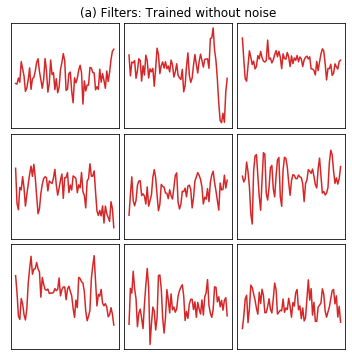

In [359]:
# and the resepctive raw filters
fig, axes = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})
layer = 1 #first CNN layer)

filters, biases = model_baseline.layers[layer].get_weights()
filts = filters[:, 0]
axes= axes.flatten()

profile = normal(x_all)[trace]
for ax, d in zip(axes, filts.T[18::2]):
    #ax.plot(profile[35:-35], '-', alpha=0.5)
    ax.plot(d, c='C3')
    ax.set_xticks([])
    ax.set_yticks([])
axes[1].set_title('(a) Filters: Trained without noise')
fig.tight_layout()
figpath = Path.home().joinpath('Dropbox/Projects/undt-ai/Figures')
# fig.savefig(figpath / 'filters_nonoise.png', dpi=400)

# Noisy

In [147]:
# Reload the inital (untrained model)
model_noisy = load_model('tmp.h5', custom_objects={'rmse': rmse})

In [148]:
# And train on oisy data
model_checkpoint = ModelCheckpoint(filepath='tmp_noisy.h5', monitor='val_loss',
                                                            save_best_only=True)
model_noisy.fit(normal(x_train_noise), [1000 * y_train_D],
                                            epochs=300, batch_size=128, 
                                            validation_data=[normal(x_val), 1000 * y_val_D], callbacks=[model_checkpoint])

Train on 8379 samples, validate on 932 samples
Epoch 1/300
8379/8379 [==============================] - 2s 223us/sample - loss: 15.6278 - rmse: 3.1508 - val_loss: 1.5815 - val_rmse: 1.2618
Epoch 2/300
8379/8379 [==============================] - 1s 89us/sample - loss: 1.5870 - rmse: 1.2383 - val_loss: 2.3153 - val_rmse: 1.5283
Epoch 3/300
8379/8379 [==============================] - 1s 93us/sample - loss: 1.2851 - rmse: 1.1198 - val_loss: 1.5046 - val_rmse: 1.2160
Epoch 4/300
8379/8379 [==============================] - 1s 95us/sample - loss: 1.1377 - rmse: 1.0462 - val_loss: 1.0292 - val_rmse: 1.0259
Epoch 5/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.9534 - rmse: 0.9599 - val_loss: 1.9607 - val_rmse: 1.3936
Epoch 6/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.9133 - rmse: 0.9256 - val_loss: 0.6237 - val_rmse: 0.7828
Epoch 7/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.8342 - rmse: 0.8922 - val_los

Epoch 59/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0651 - rmse: 0.2497 - val_loss: 0.2629 - val_rmse: 0.5122
Epoch 60/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0674 - rmse: 0.2545 - val_loss: 0.2713 - val_rmse: 0.5169
Epoch 61/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0907 - rmse: 0.2952 - val_loss: 0.5895 - val_rmse: 0.7713
Epoch 62/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0733 - rmse: 0.2681 - val_loss: 0.6067 - val_rmse: 0.7829
Epoch 63/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0778 - rmse: 0.2741 - val_loss: 0.2314 - val_rmse: 0.4858
Epoch 64/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0516 - rmse: 0.2247 - val_loss: 0.2246 - val_rmse: 0.4799
Epoch 65/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0461 - rmse: 0.2131 - val_loss: 0.2508 - val_rmse: 0.4978
Epoch 66/300


Epoch 117/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0386 - rmse: 0.1941 - val_loss: 0.2570 - val_rmse: 0.5083
Epoch 118/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0353 - rmse: 0.1857 - val_loss: 0.2140 - val_rmse: 0.4652
Epoch 119/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0348 - rmse: 0.1837 - val_loss: 0.2537 - val_rmse: 0.5098
Epoch 120/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0354 - rmse: 0.1846 - val_loss: 0.2012 - val_rmse: 0.4480
Epoch 121/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0332 - rmse: 0.1757 - val_loss: 0.1955 - val_rmse: 0.4417
Epoch 122/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0358 - rmse: 0.1868 - val_loss: 0.2466 - val_rmse: 0.4952
Epoch 123/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0384 - rmse: 0.1928 - val_loss: 0.2081 - val_rmse: 0.4548
Epoch 

Epoch 175/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.0224 - rmse: 0.1480 - val_loss: 0.2403 - val_rmse: 0.4923
Epoch 176/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0253 - rmse: 0.1569 - val_loss: 0.2284 - val_rmse: 0.4793
Epoch 177/300
8379/8379 [==============================] - 1s 94us/sample - loss: 0.0258 - rmse: 0.1591 - val_loss: 0.1853 - val_rmse: 0.4307
Epoch 178/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.0295 - rmse: 0.1672 - val_loss: 0.1938 - val_rmse: 0.4417
Epoch 179/300
8379/8379 [==============================] - 1s 94us/sample - loss: 0.0300 - rmse: 0.1703 - val_loss: 0.2423 - val_rmse: 0.4923
Epoch 180/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.0247 - rmse: 0.1558 - val_loss: 0.2266 - val_rmse: 0.4750
Epoch 181/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0234 - rmse: 0.1510 - val_loss: 0.1836 - val_rmse: 0.4273
Epoch 

Epoch 233/300
8379/8379 [==============================] - 1s 93us/sample - loss: 0.0162 - rmse: 0.1258 - val_loss: 0.1822 - val_rmse: 0.4227
Epoch 234/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0197 - rmse: 0.1386 - val_loss: 0.1890 - val_rmse: 0.4336
Epoch 235/300
8379/8379 [==============================] - 1s 95us/sample - loss: 0.0206 - rmse: 0.1405 - val_loss: 0.1617 - val_rmse: 0.4028
Epoch 236/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0252 - rmse: 0.1561 - val_loss: 0.1729 - val_rmse: 0.4145
Epoch 237/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0163 - rmse: 0.1267 - val_loss: 0.1633 - val_rmse: 0.4011
Epoch 238/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0158 - rmse: 0.1243 - val_loss: 0.1793 - val_rmse: 0.4212
Epoch 239/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0164 - rmse: 0.1260 - val_loss: 0.1690 - val_rmse: 0.4069
Epoch 

Epoch 291/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0191 - rmse: 0.1349 - val_loss: 0.1649 - val_rmse: 0.4035
Epoch 292/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0155 - rmse: 0.1222 - val_loss: 0.2029 - val_rmse: 0.4509
Epoch 293/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0145 - rmse: 0.1178 - val_loss: 0.1838 - val_rmse: 0.4232
Epoch 294/300
8379/8379 [==============================] - 1s 92us/sample - loss: 0.0150 - rmse: 0.1197 - val_loss: 0.1597 - val_rmse: 0.3948
Epoch 295/300
8379/8379 [==============================] - 1s 89us/sample - loss: 0.0134 - rmse: 0.1137 - val_loss: 0.1844 - val_rmse: 0.4281
Epoch 296/300
8379/8379 [==============================] - 1s 91us/sample - loss: 0.0182 - rmse: 0.1313 - val_loss: 0.1646 - val_rmse: 0.4039
Epoch 297/300
8379/8379 [==============================] - 1s 90us/sample - loss: 0.0111 - rmse: 0.1038 - val_loss: 0.1648 - val_rmse: 0.4026
Epoch 

In [164]:
# Load best model from checkpoint and grab activations
model_noisy.load_weights('tmp_noisy.h5')
layer_outputs_noisy = [layer.output for layer in model_noisy.layers[:6]] # Extracts the outputs of the top 12 layers
activation_model_noisy = models.Model(inputs=model_noisy.input, outputs=layer_outputs_noisy) # Creates a model that will return these outputs, given the model input

In [206]:
activations_noisy = activation_model_noisy.predict(normal(x_all)) # Returns a list of five Numpy arrays: one array per layer activation

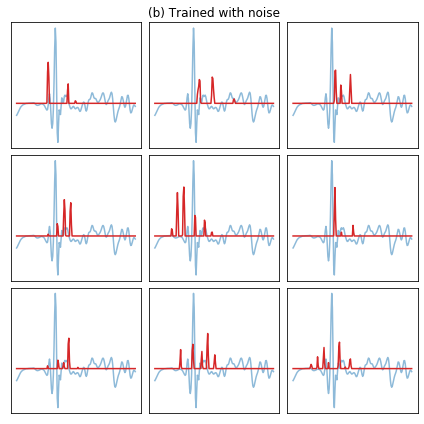

In [362]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True) # , gridspec_kw = {'wspace':0.05, 'hspace':0.05})
layer = 1 #first CNN layer)
trace= 4651# 5004
acts = activations_noisy[layer][trace]
axes= axes.flatten()

profile = normal(x_all)[trace]
for ax, d in zip(axes, acts.T[18::2]):
    ax.plot(profile[35:-35] / 2, '-', alpha=0.5)
    ax.plot(d, c='C3')
    ax.set_xticks([])
    ax.set_yticks([])
#fig.subplots_adjust(wspace=0.05, hspace=0.05)
axes[1].set_title('(b) Trained with noise')
fig.tight_layout(w_pad=-1.25, h_pad=0.35)
figpath = Path.home().joinpath('Dropbox/Projects/undt-ai/Figures')
#plt.savefig(figpath / 'activations_noise.png', dpi=400)

C:\Users\casim\Miniconda3\envs\mlflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


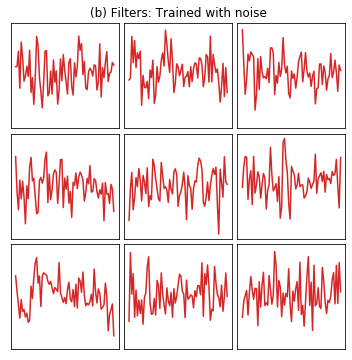

In [333]:
# and filters
fig, axes = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})
layer = 1 #first CNN layer)

filters, biases = model_noisy.layers[layer].get_weights()
filts = filters[:, 0]
axes= axes.flatten()

profile = normal(x_all)[trace]
for ax, d in zip(axes, filts.T[18::2]):
    #ax.plot(profile[35:-35], '-', alpha=0.5)
    ax.plot(d, c='C3')
    ax.set_xticks([])
    ax.set_yticks([])
axes[1].set_title('(b) Filters: Trained with noise')
fig.tight_layout()

figpath = Path.home().joinpath('Dropbox/Projects/undt-ai/Figures')
# fig.savefig(figpath / 'filters_noise.png', dpi=400)

In [318]:
d.shape

(64,)

# Compare

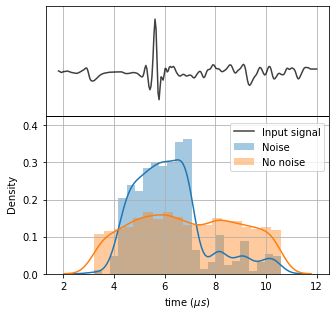

In [441]:
plt.figure(figsize=(4.75, 4.5))
layer = 1 #first CNN layer)
trace=4651
acts_base = activations_baseline[layer][trace]
acts_noisy = activations_noisy[layer][trace]

hist = []
plt.plot(t_coup[0][45:]*1e6,0.4+(1 + normal(x_all)[trace])/7, 'k', alpha=0.75, label='Input signal') 


for act in acts_noisy.T:   
    act_times = t_coup[0, :, 0][45 + np.arange(35, 255-35)[act>0]]*1e6
    hist.append(act_times)
    #plt.plot(act[act>0], 'ro', alpha=0.3)
sns.distplot(np.hstack(hist), label='Noise')

hist = []
for act in acts_base.T:
    act_times = t_coup[0, :, 0][45 + np.arange(35, 255-35)[act>0]]*1e6
    hist.append(act_times)
    #plt.plot(act[act>0], 'ko', alpha=0.3)
sns.distplot(np.hstack(hist), label='No noise')
plt.yticks([0, 0.1,0.2, 0.3, 0.4])
plt.axhline(0.425, c='k', ls='-', lw=1)
plt.xlabel(r'time ($\mu s$)')
plt.ylabel(r'Density')
plt.gca().yaxis.set_label_coords(-0.1,0.3)
plt.legend(loc=5, bbox_to_anchor=(1.,0.475))
plt.tight_layout()
# plt.axvline(4.55, c='k', lw=1, ls='--')
# plt.axvline(6.75, c='k', lw=1, ls='--')
plt.grid()
figpath = Path.home().joinpath('Dropbox/Projects/undt-ai/Figures')
plt.savefig(figpath / 'activations_comp.png', dpi=400)